>expected=0.3, predicted=0.2
>expected=0.4, predicted=0.2
>expected=0.2, predicted=0.4
MAE: 0.151


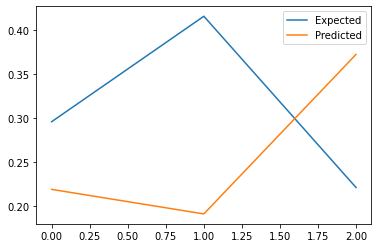

In [15]:
data = np.concatenate((train, test))

mae, y, yhat, model= walk_forward_validation(data, 3)
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [3]:
import pandas as pd 
import timeseries as ts
from pandas import DataFrame
import numpy as np
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

In [4]:

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 #if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [5]:

sarima0000107 = ts.TimeSeries((0, 0, 0), (0, 1, 0, 7))

df = sarima0000107.train_data.to_numpy()
test_df = sarima0000107.test_data.to_numpy()

Fecha
2017-01-01      123704
2017-01-02    21209771
2017-01-03    26706072
2017-01-04    29734324
2017-01-05    58392417
Name: Ventas, dtype: int64
Model Fitting Time: 0.03869891166687012
                                SARIMAX Results                                
Dep. Variable:                  Ventas   No. Observations:                  912
Model:             SARIMAX(0, 1, 0, 7)   Log Likelihood                1150.048
Date:                 Tue, 01 Dec 2020   AIC                          -2298.096
Time:                         19:02:40   BIC                          -2293.289
Sample:                     01-01-2017   HQIC                         -2296.260
                          - 07-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        

In [6]:
train = series_to_supervised(df, n_out = 1)
test = series_to_supervised(test_df, n_out = 1)



In [14]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX, estimators = 1000):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=estimators)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0], model
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, estimators = 1000):
	predictions = list()
	# split dataset
	model = {}
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat, model = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions, model

>expected=0.0, predicted=0.2
>expected=0.0, predicted=0.0
>expected=0.1, predicted=0.1
>expected=0.1, predicted=0.2
>expected=0.2, predicted=0.2
>expected=0.1, predicted=0.1
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.1
>expected=0.0, predicted=0.0
>expected=0.1, predicted=0.1
>expected=0.1, predicted=0.1
>expected=0.2, predicted=0.2
>expected=0.1, predicted=0.1
>expected=0.0, predicted=0.1
>expected=0.0, predicted=0.0
>expected=0.0, predicted=0.1
>expected=0.2, predicted=0.1
>expected=0.1, predicted=0.1
>expected=0.2, predicted=0.1
>expected=0.1, predicted=0.1
>expected=0.0, predicted=0.1
>expected=0.0, predicted=0.1
>expected=0.0, predicted=0.1
>expected=0.1, predicted=0.1
>expected=0.1, predicted=0.2
>expected=0.2, predicted=0.1
>expected=0.1, predicted=0.1
>expected=0.0, predicted=0.1
>expected=0.0, predicted=0.0
>expected=0.1, predicted=0.1
>expected=0.1, predicted=0.1
>expected=0.1, predicted=0.1
>expected=0.2, predicted=0.1
>expected=0.1, predicted=0.1
>expected=0.1,

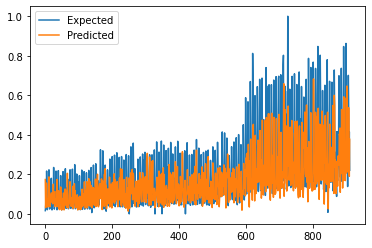

In [24]:
data = np.concatenate((train, test))
# evaluate
mae, y, yhat, model = walk_forward_validation(data, len(train))
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [25]:
model

RandomForestRegressor(n_estimators=1000)

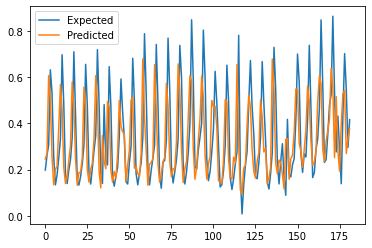

RMSE:  0.17093249457883067


[array([0.24540073]),
 array([0.26748878]),
 array([0.60633732]),
 array([0.49939964]),
 array([0.25368836]),
 array([0.13432177]),
 array([0.20156896]),
 array([0.21200761]),
 array([0.38102421]),
 array([0.5672272]),
 array([0.45635557]),
 array([0.20861558]),
 array([0.13965208]),
 array([0.16679517]),
 array([0.24021143]),
 array([0.30613157]),
 array([0.57864175]),
 array([0.46549705]),
 array([0.24483784]),
 array([0.13152215]),
 array([0.18703348]),
 array([0.18811128]),
 array([0.25164828]),
 array([0.5556961]),
 array([0.47257954]),
 array([0.19783334]),
 array([0.14552505]),
 array([0.19945284]),
 array([0.22854132]),
 array([0.33463316]),
 array([0.60560813]),
 array([0.47949399]),
 array([0.19383852]),
 array([0.12047052]),
 array([0.34652924]),
 array([0.23594677]),
 array([0.20343008]),
 array([0.49303961]),
 array([0.47014979]),
 array([0.19754952]),
 array([0.14475089]),
 array([0.19129941]),
 array([0.16270737]),
 array([0.26771234]),
 array([0.49755574]),
 array([0.38

In [26]:
predictions = list()
testC = test[:, :-1]
for i in range(len(testC)):
    prediction = model.predict([testC[i]])
    predictions.append(prediction)

# plot expected vs predicted
pyplot.plot(testC, label='Expected')
pyplot.plot(predictions, label='Predicted')
pyplot.legend()
pyplot.show()

print("RMSE: ", np.sqrt(((predictions - testC) ** 2).mean()))

predictions